#**Importing Necessary libraries**


In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model

2024-03-11 09:43:46.607743: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


# **Pre-processing**
**Normalizing the data into 0 to 1 and reshaping the size**

In [2]:
def preprocess(array):
    """
    Normalizes the supplied array and reshapes it into the appropriate format.
    """

    array = array.astype("float32") / 255.0
    array = np.reshape(array, (len(array), 28, 28, 1))
    return array

# **Adding noise to the original images**

In [3]:
def noise(array):
    """
    Adds random noise to each image in the supplied array.
    """

    noise_factor = 0.4
    noisy_array = array + noise_factor * np.random.normal(
        loc=0.0, scale=1.0, size=array.shape
    )

    return np.clip(noisy_array, 0.0, 1.0)

# **Visualizing the images**

In [4]:
def display(array1, array2):
    """
    Displays ten random images from each one of the supplied arrays.
    """

    n = 10

    indices = np.random.randint(len(array1), size=n)
    images1 = array1[indices, :]
    images2 = array2[indices, :]

    plt.figure(figsize=(20, 4))
    for i, (image1, image2) in enumerate(zip(images1, images2)):
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(image1.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(image2.reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

    plt.show()


# **Preparing the data**

11493376/11490434 [==============================] - 3s 0us/step


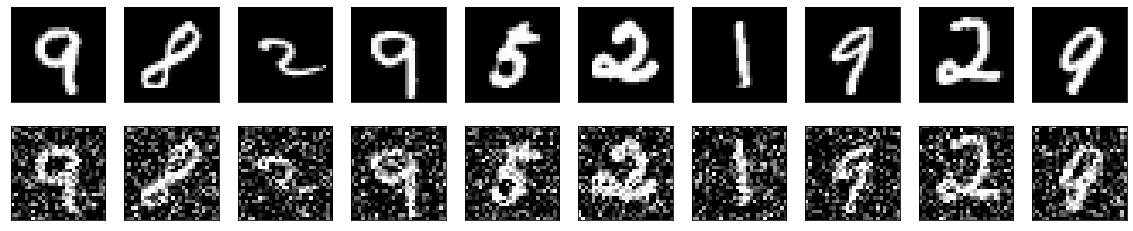

In [5]:
# Since we only need images from the dataset to encode and decode, we
# won't use the labels.
(train_data, _), (test_data, _) = mnist.load_data()

# Normalize and reshape the data
train_data = preprocess(train_data)
test_data = preprocess(test_data)

# Create a copy of the data with added noise
noisy_train_data = noise(train_data)
noisy_test_data = noise(test_data)

# Display the train data and a version of it with added noise
display(train_data, noisy_train_data)

# **Building the Autoencoder**

In [6]:
input = layers.Input(shape=(28, 28, 1))

# Encoder
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(input)
x = layers.MaxPooling2D((2, 2), padding="same")(x)
x = layers.Conv2D(32, (3, 3), activation="relu", padding="same")(x)
x = layers.MaxPooling2D((2, 2), padding="same")(x)

# Decoder
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
x = layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)

# Autoencoder
autoencoder = Model(input, x)
autoencoder.compile(optimizer="adam", loss="binary_crossentropy")
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        9248  

# **Training the model**

In [7]:
autoencoder.fit(
    x=train_data,
    y=train_data,
    epochs=50,
    batch_size=128,
    shuffle=True,
    validation_data=(test_data, test_data),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50


2024-03-11 09:44:06.154990: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2024-03-11 09:44:06.230833: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1666] Found device 0 with properties: 
name: NVIDIA A100-SXM4-40GB MIG 3g.20gb major: 8 minor: 0 memoryClockRate(GHz): 1.41
pciBusID: 0000:bd:00.0
2024-03-11 09:44:06.230878: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2024-03-11 09:44:06.236826: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2024-03-11 09:44:06.265383: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcufft.so.10
2024-03-11 09:44:06.265809: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcurand.so.10
2024-03-11 09:44:06.266554: I tensorflow/stream_executor

60000/60000 [==============================] - 10s 162us/sample - loss: 0.1273 - val_loss: 0.0732
Epoch 2/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0718 - val_loss: 0.0696
Epoch 3/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0694 - val_loss: 0.0681
Epoch 4/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0681 - val_loss: 0.0672
Epoch 5/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0673 - val_loss: 0.0667
Epoch 6/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0666 - val_loss: 0.0660
Epoch 7/50
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0662 - val_loss: 0.0655
Epoch 8/50
60000/60000 [==============================] - 2s 28us/sample - loss: 0.0658 - val_loss: 0.0652
Epoch 9/50
60000/60000 [==============================] - 2s 27us/sample - loss: 0.0655 - val_loss: 0.0649
Epoch 10/50
60000/60000 [=====================

# **Prediction**

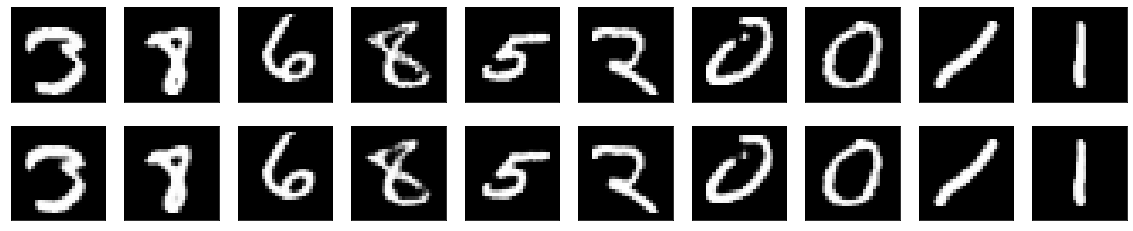

In [8]:
predictions = autoencoder.predict(test_data)
display(test_data, predictions)

In [ ]:
autoencoder.fit(
    x=noisy_train_data,
    y=train_data,
    epochs=100,
    batch_size=128,
    shuffle=True,
    validation_data=(noisy_test_data, test_data),
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0997 - val_loss: 0.0928
Epoch 2/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0925 - val_loss: 0.0908
Epoch 3/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0909 - val_loss: 0.0901
Epoch 4/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0900 - val_loss: 0.0889
Epoch 5/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0894 - val_loss: 0.0883
Epoch 6/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0888 - val_loss: 0.0878
Epoch 7/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.0884 - val_loss: 0.0876
Epoch 8/100
60000/60000 [==============================] - 2s 29us/sample - loss: 0.0880 - val_loss: 0.0871
Epoch 9/100
60000/60000 [==============================] - 2s 30us/sample - loss: 0.08

In [ ]:
predictions = autoencoder.predict(noisy_test_data)
display(noisy_test_data, predictions)